
# Investigating the relationship between alcoholics and non-alcoholics who have diseases such as diabetes and hipertension.



#### For this study, we used the dataset medical appointments in Brazil, this dataset has information regarding medical appointments and disease rates for each patient.
#### For this work, we defined some questions to be analyzed:

  #### 1 - What is the correlation between illnesses and age?

  #### 2 - What is the average age by gender of the patients?

  #### 3 - Is there a correlation between the average age point and the increase in the incidence of diseases?

  #### 4 - What is the correlation between alcoholism and diseases such as diabetes and hipertension?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Function to convert a range of percent to 100%
def converte(val):
    return val * 100

In [2]:
df = pd.read_csv('data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Verifying if have null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
#For this analysis the columns that identify the patient will not be important to us
df.drop(columns=['PatientId','AppointmentID'], inplace=True)
df = df.query('Age > 0')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### For this dataset we didn't have any problems with null data, we just had to remove some unnecessary columns.

## Correlation between age vs percentage of Diabetes and Hipertension

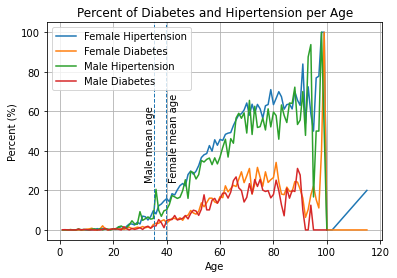

In [5]:
m_mean_age = df[df["Gender"]== 'M'].mean().Age # Média de idade do sexo masculino
f_mean_age = df[df["Gender"]== 'F'].mean().Age # Média de idade do sexo feminino

# Média de hipertensão do sexo masculino por idade
m_mean_hp = converte(df[df["Gender"]== 'M'].groupby(['Age']).mean().Hipertension )
m_mean_hp = m_mean_hp.round(2)
m_mean_hp

# Média de hipertensão do sexo feminino por idade
f_mean_hp = converte(df[df["Gender"]== 'F'].groupby(['Age']).mean().Hipertension)
f_mean_hp =  f_mean_hp.round(2)
f_mean_hp

m_mean_db = converte(df[df["Gender"]== 'M'].groupby(['Age']).mean().Diabetes)
m_mean_db = m_mean_db.round(2)
m_mean_db

f_mean_db = converte(df[df["Gender"]== 'F'].groupby(['Age']).mean().Diabetes)
f_mean_db = f_mean_db.round(2)
f_mean_db

plt.plot(f_mean_hp, label='Female Hipertension')
plt.plot(f_mean_db, label = 'Female Diabetes')
plt.plot(m_mean_hp, label ='Male Hipertension')
plt.plot(m_mean_db, label='Male Diabetes')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Percent (%)')
plt.title('Percent of Diabetes and Hipertension per Age')
plt.axvline(m_mean_age,linestyle='dashed', linewidth=1)
plt.text(m_mean_age-3.5,25,'Male mean age',rotation=90)
plt.axvline(f_mean_age,linestyle='dashed', linewidth=1)
plt.text(f_mean_age+1,25,'Female mean age',rotation=90)
plt.legend()

plt.show()




In the graph above we can see the direct correlation between age vs percentage of hipertension and diabetes.
As age increases, the rates of the aforementioned diseases also increase considerably.
Another point to be highlighted based on the information in the graph is the male hipertension peak as it determines the mean age in the graph.

We can notice an acceleration in the graph curve from the average age of each analyzed group.

### Histograms per variable

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

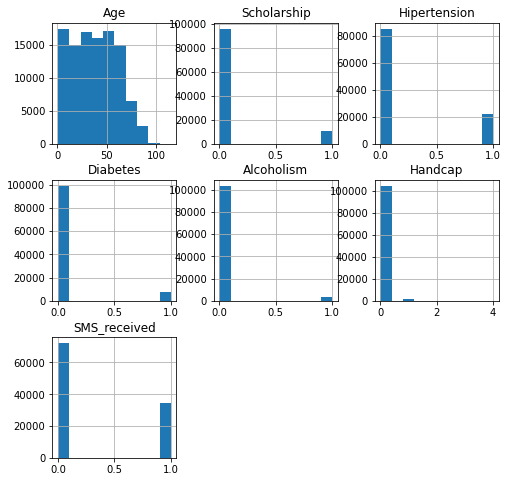

In [6]:
df.hist(figsize=(8,8))

### Graph mean age between Male and Female

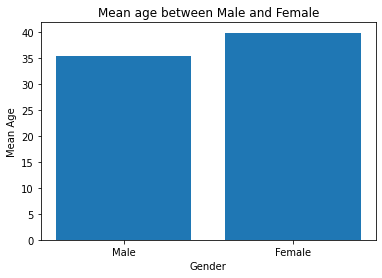

In [7]:
locations = [1, 2]
heights = [m_mean_age, f_mean_age]
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean age between Male and Female')
plt.xlabel('Gender')
plt.ylabel('Mean Age');

### Correlation between diseases such as diabetes and hipertension in alcoholics and non-alcoholics.

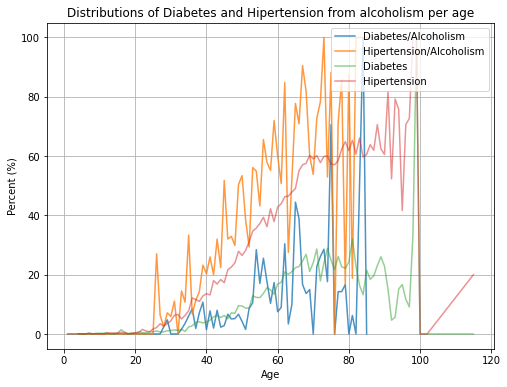

In [8]:
df_alcoholism = df.query('Alcoholism == 1')
df_non_alcoholism = df.query('Alcoholism == 0')

alcoholism_mean = df_alcoholism.groupby('Age').mean()
non_alcoholism_mean = df_non_alcoholism.groupby('Age').mean()

y = np.arange(0,df[df['Alcoholism']==1].max()['Age'] +1,1)

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(converte(alcoholism_mean['Diabetes']), alpha=0.8, 
        label='Diabetes/Alcoholism')
ax.plot(converte(alcoholism_mean['Hipertension']), alpha=0.8, 
        label='Hipertension/Alcoholism')
ax.plot(converte(non_alcoholism_mean['Diabetes']), alpha=0.5, 
        label='Diabetes')
ax.plot(converte(non_alcoholism_mean['Hipertension']), alpha=0.5, 
        label='Hipertension')
ax.set_title('Distributions of Diabetes and Hipertension from alcoholism per age')
ax.set_xlabel('Age')
ax.set_ylabel('Percent (%)')
ax.legend(loc='upper right')

plt.grid()
plt.show();

In the graph above, we can see the correlation between alcoholic people with diseases such as diabetes and hipertension, compared to non-alcoholic people.
We can clearly see based on the data in the graph that alcoholic people are more prone to illnesses such as hipertension.
Diabetes also shows some sudden peaks in some age groups, but not as much as hipertension.

<a id='conclusions'></a>
## Conclusions

Based on the information from the first case study, we can conclude that in the first case there is a clear relationship between age and diseases such as hipertension and diabetes.
In the second case study, we sought to understand the relationship between alcoholics and non-alcoholics with regard to diseases such as diabetes and hipertension.
In this case we can conclude that alcoholics are more likely to contract hipertension, when we talk about diabetes, groups of alcoholic people have some higher peaks of diabetes, but less intense than hipertension.


## Limitations

We believe that one of the main limitations of the dataset is the little variety of variables for analysis and comparison, we could have more columns with specific information to make correlations.

## References


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

